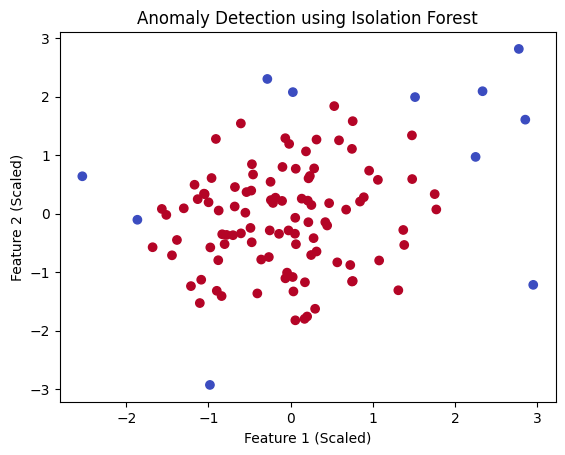

Model and scaler saved successfully!


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler  # Added StandardScaler
import joblib

# Generate synthetic data (Replace with real data)
np.random.seed(42)
X = np.random.normal(0, 1, (100, 2))  # Normal data points
X_anomaly = np.random.uniform(-4, 4, (10, 2))  # Anomalies
X = np.vstack((X, X_anomaly))

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit & transform the dataset

# Train Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X_scaled)  # Train on scaled data

# Predict anomalies (-1 means anomaly, 1 means normal)
labels = model.predict(X_scaled)

# Visualize results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap="coolwarm")
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

# Save model for deployment
joblib.dump(model, "isolation_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")  # Save scaler for future use
print("Model and scaler saved successfully!")


In [2]:
%pip install joblib
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from nyoka import skl_to_pmml
import joblib
import numpy as np

# Load trained model
model = joblib.load("isolation_forest_model.pkl")

# Generate synthetic data (Replace with real data)
np.random.seed(42)
X = np.random.normal(0, 1, (100, 2))  # Normal data points
X_anomaly = np.random.uniform(-4, 4, (10, 2))  # Anomalies
X = np.vstack((X, X_anomaly))

# Fit the StandardScaler
scaler = StandardScaler()
scaler.fit(X)  # Fit the scaler to the dataset

# Create a pipeline with preprocessing + model
pipeline = Pipeline([
    ("scaler", scaler),  # Use the fitted scaler
    ("model", model)  # Your trained model
])

# Convert to PMML
skl_to_pmml(pipeline, col_names=["feature1", "feature2"], target_name="anomaly", pmml_f_name="model.pmml")
print("Model converted to PMML format successfully!")


Model converted to PMML format successfully!


In [4]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load("model.pmml")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json["input_data"]
    prediction = model.predict([data])
    return jsonify({"prediction": prediction.tolist()})

if __name__ == "__main__":
    app.run(port=5000)

KeyError: 60

In [5]:
!pip joblib

ERROR: unknown command "joblib"



In [ ]:
!conda install -c conda-forge onnx


In [ ]:
!conda install -c conda-forge --solver=libmamba onnx